In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('response_times.csv')
df.head()

,iteracao,endpoint,tempo_resposta
0,1,register,0.305672
1,1,login,0.019673
2,1,refresh,0.038064
3,1,logout,0.010074
4,2,register,0.007891


In [14]:
stats = df.groupby('endpoint')['tempo_resposta'].describe()

print("Estatísticas descritivas por endpoint:")
print(stats)

Estatísticas descritivas por endpoint:
           count      mean       std       min       25%       50%       75%  \
endpoint                                                                       
login     1000.0  0.004948  0.001291  0.002835  0.004208  0.004754  0.005423   
logout    1000.0  0.005560  0.001016  0.003522  0.004854  0.005465  0.006174   
refresh   1000.0  0.005642  0.001429  0.003490  0.004915  0.005402  0.006140   
register  1000.0  0.005443  0.009553  0.003141  0.004518  0.004959  0.005537   

               max  
endpoint            
login     0.019673  
logout    0.012424  
refresh   0.038064  
register  0.305672  


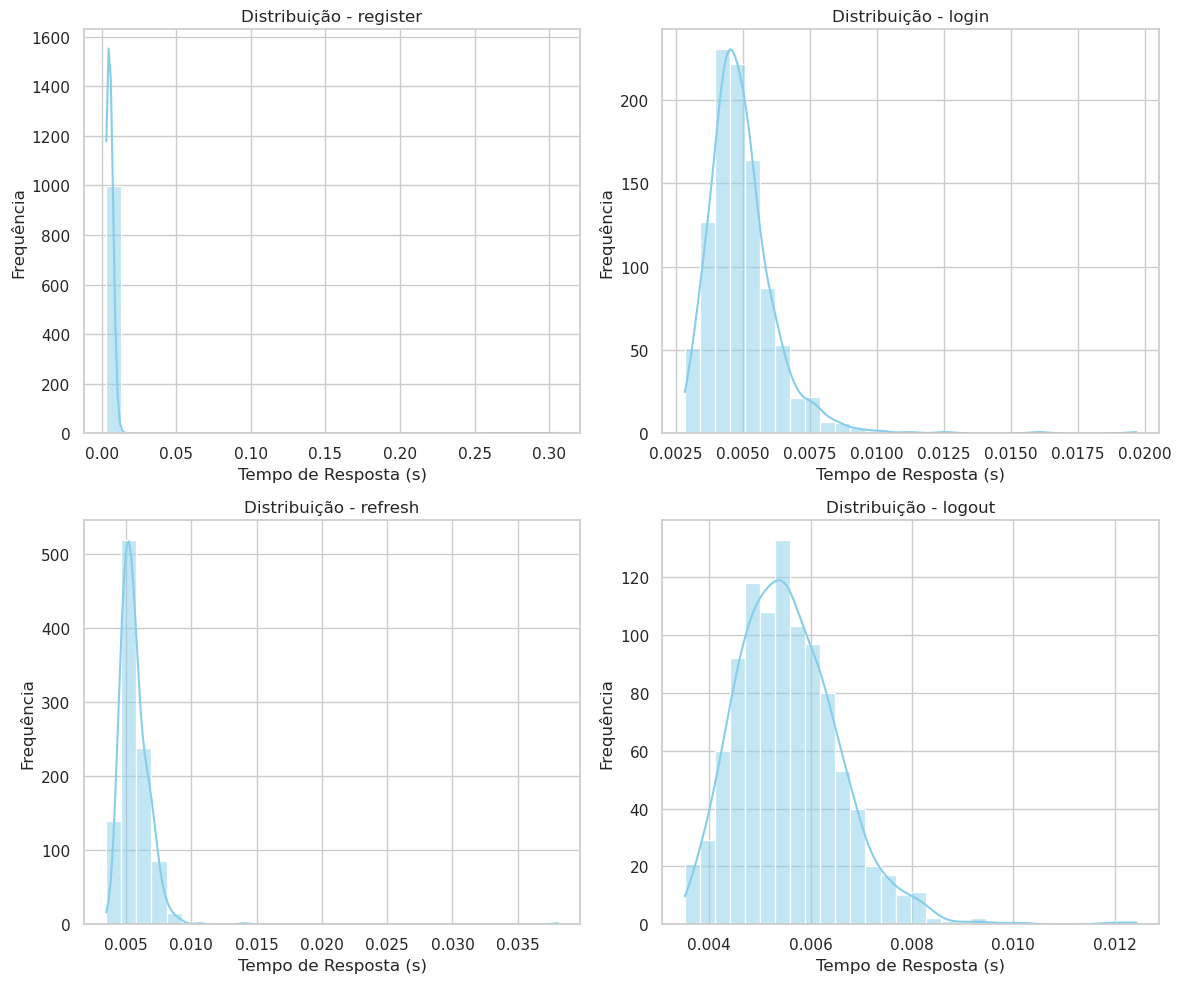

In [24]:
import seaborn as sns

plt.figure(figsize=(12, 10))
endpoints = df['endpoint'].unique()

for i, endpoint in enumerate(endpoints, 1):
    plt.subplot(2, 2, i)
    subset = df[df['endpoint'] == endpoint]
    sns.histplot(subset['tempo_resposta'], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribuição - {endpoint}')
    plt.xlabel('Tempo de Resposta (s)')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


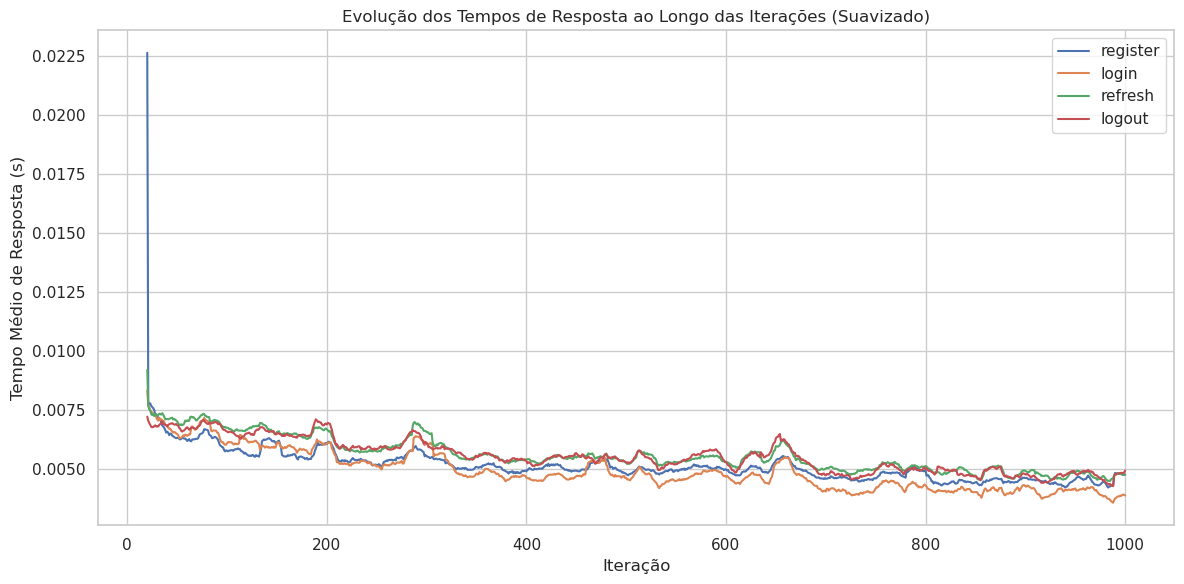

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for endpoint in df['endpoint'].unique():
    subset = df[df['endpoint'] == endpoint]
    # Suaviza com média móvel (rolling)
    avg_per_iteration = subset.groupby('iteracao')['tempo_resposta'].mean().rolling(window=20).mean()
    plt.plot(avg_per_iteration, label=endpoint)

plt.title('Evolução dos Tempos de Resposta ao Longo das Iterações (Suavizado)')
plt.xlabel('Iteração')
plt.ylabel('Tempo Médio de Resposta (s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


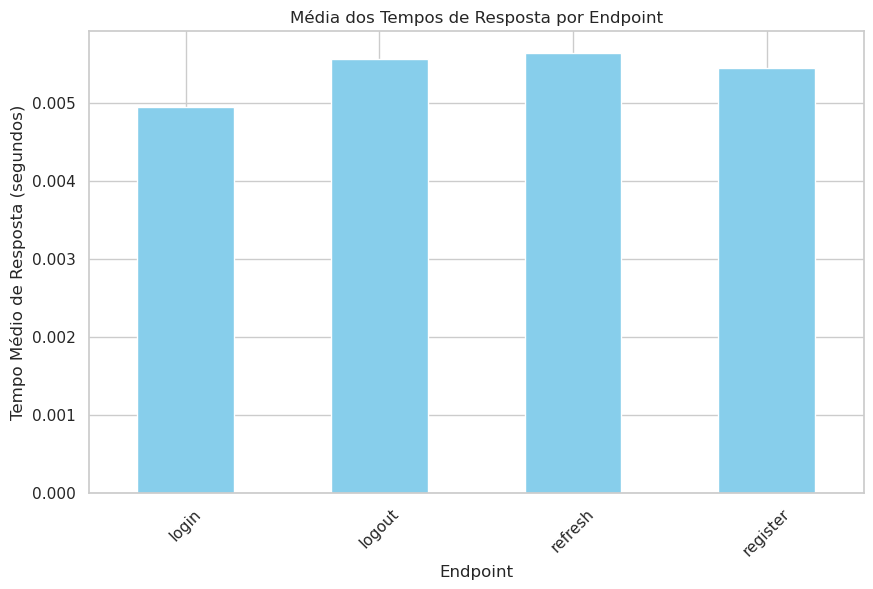

In [21]:
mean_times.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Média dos Tempos de Resposta por Endpoint')
plt.xlabel('Endpoint')
plt.ylabel('Tempo Médio de Resposta (segundos)')
plt.xticks(rotation=45)
plt.show()